In [181]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel, RFE

In [108]:
# load the data
df = pd.read_csv("790/ai_job_market_insights.csv")
#df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [9]:
df.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [12]:
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [20]:
# display the unique values for all categorical variables 
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    unique_vals = df[col].unique()
    count_unique = df[col].nunique()
    print(f"Column: {col} -- {count_unique} unique values" )
    print(unique_vals)
    print("-" * 50)

Column: Job_Title -- 10 unique values
['Cybersecurity Analyst' 'Marketing Specialist' 'AI Researcher'
 'Sales Manager' 'UX Designer' 'HR Manager' 'Product Manager'
 'Software Engineer' 'Data Scientist' 'Operations Manager']
--------------------------------------------------
Column: Industry -- 10 unique values
['Entertainment' 'Technology' 'Retail' 'Education' 'Finance'
 'Transportation' 'Telecommunications' 'Manufacturing' 'Healthcare'
 'Energy']
--------------------------------------------------
Column: Company_Size -- 3 unique values
['Small' 'Large' 'Medium']
--------------------------------------------------
Column: Location -- 10 unique values
['Dubai' 'Singapore' 'Berlin' 'Tokyo' 'San Francisco' 'London' 'Paris'
 'Sydney' 'New York' 'Toronto']
--------------------------------------------------
Column: AI_Adoption_Level -- 3 unique values
['Medium' 'Low' 'High']
--------------------------------------------------
Column: Automation_Risk -- 3 unique values
['High' 'Low' 'Medium']
-

In [21]:
df['Remote_Friendly'].unique()

array(['Yes', 'No'], dtype=object)

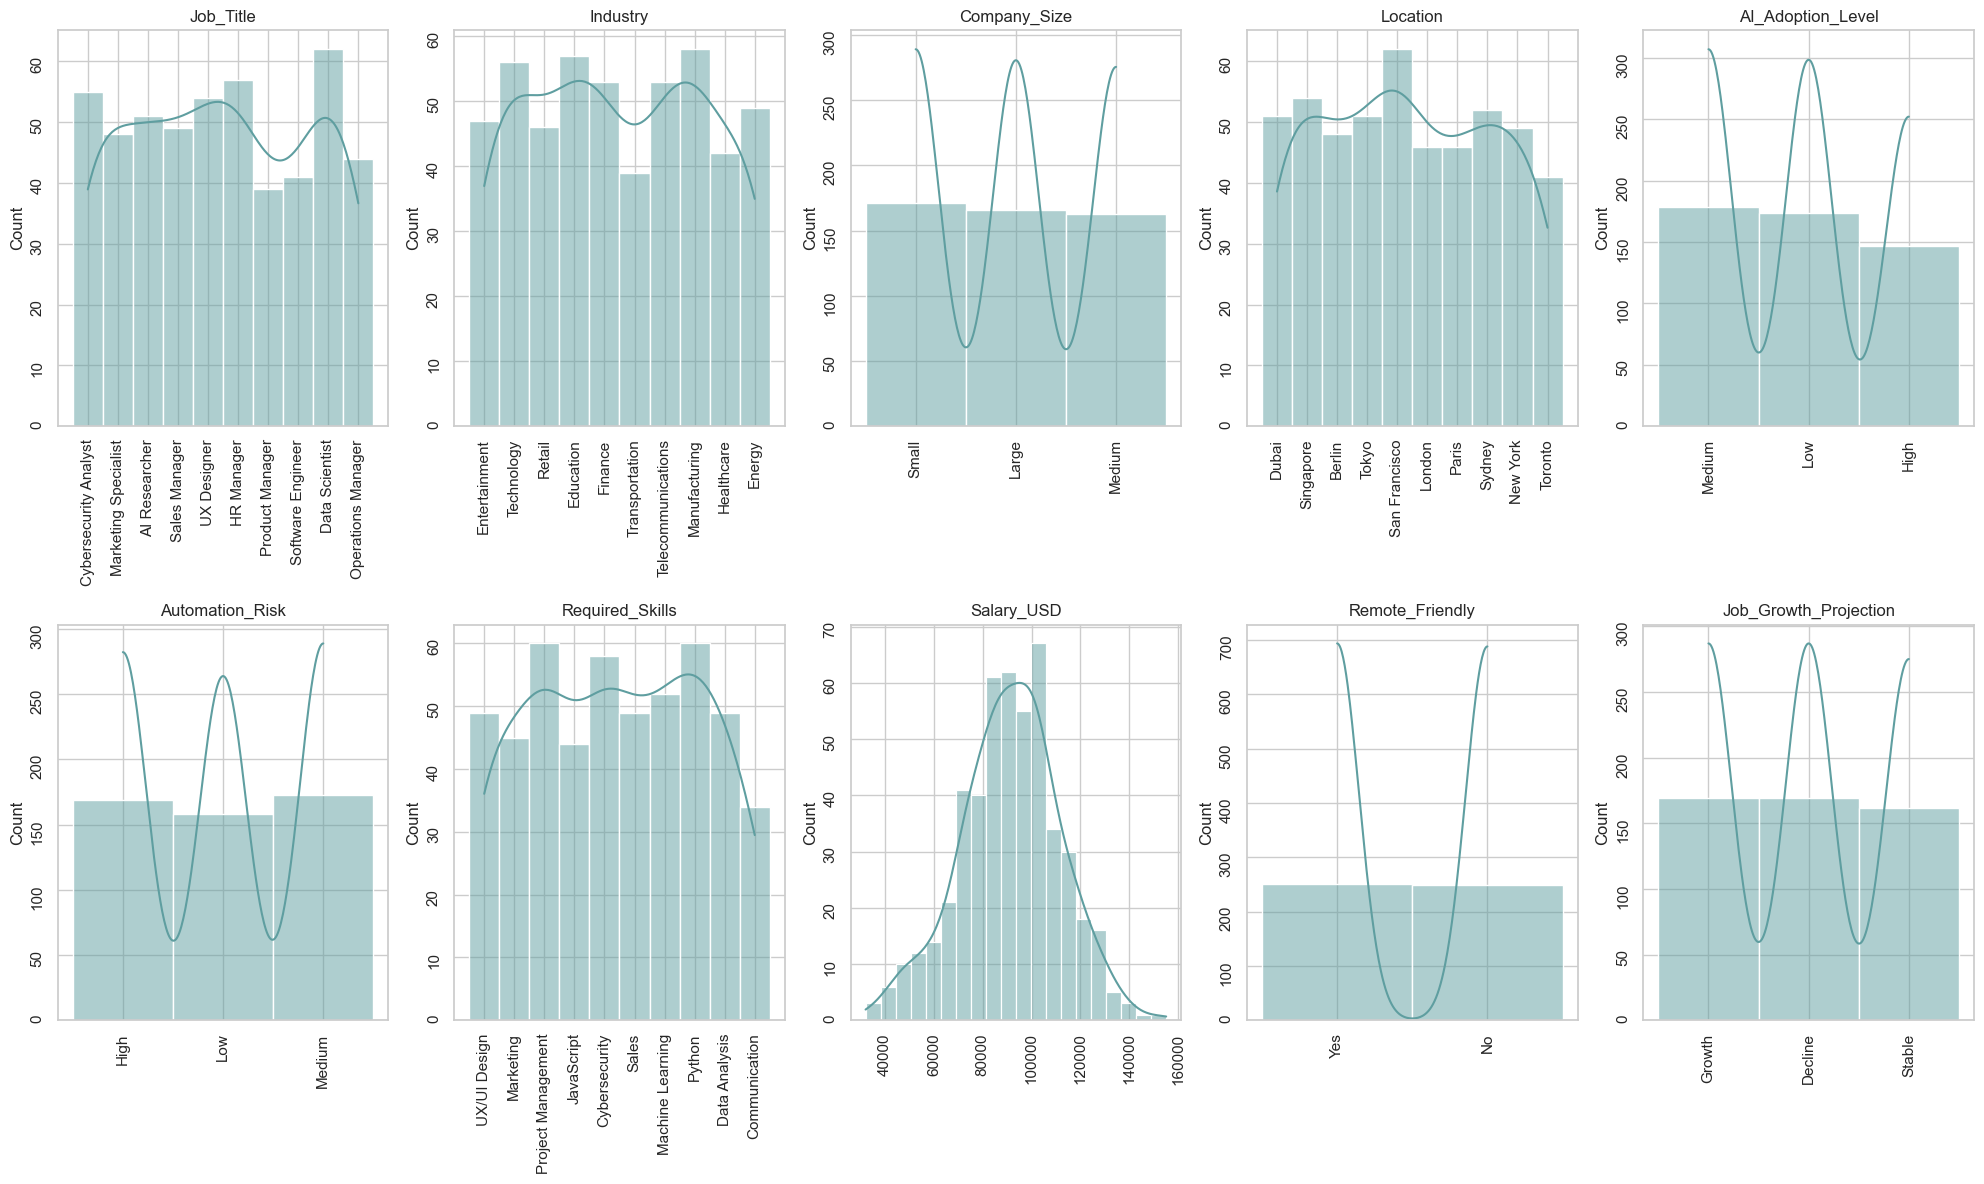

In [84]:
# plot distributions

fig, axs = plt.subplots(2, 5, figsize=(20, 12))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, color="cadetblue", ax=axs[i])
    axs[i].set_title(col)
    axs[i].tick_params(rotation=90)
    axs[i].set_xlabel('')
plt.tight_layout()

fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/AIjob_distributions.png', dpi=300)

plt.show()

/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_19113/1538579632.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='High_Medium_Adoption_Proportion', y='Industry', data=sorted_data, palette='PRGn')


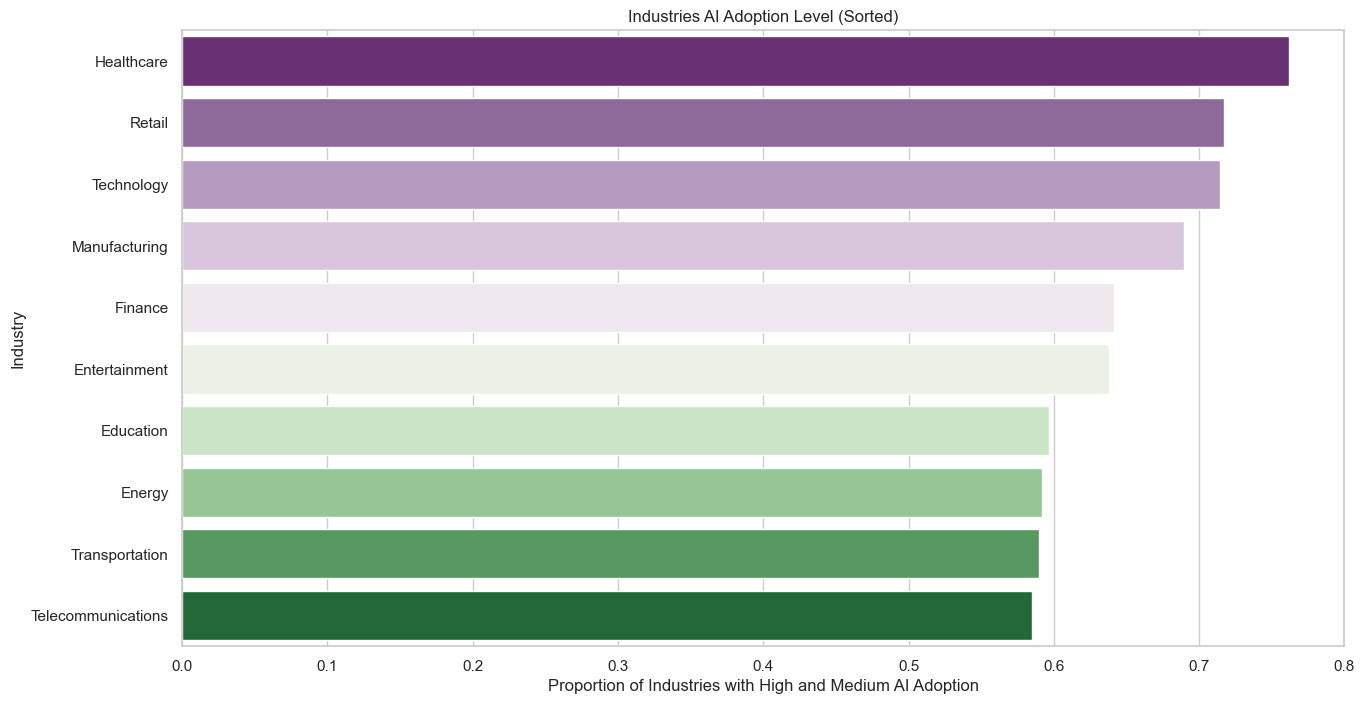

In [113]:
# EDA: explor the industry has the highest AI adoption level
df_EDA = df.copy()
# group ai adoption level by industry
high_medium_adoption = df_EDA[df_EDA['AI_Adoption_Level'].isin(['High', 'Medium'])].groupby('Industry').size().reset_index(name='High_Medium_Adoption_Count')

# compute proportions
total_per_industry = df_EDA.groupby('Industry').size().reset_index(name='Total_Count')
merged_data = pd.merge(high_medium_adoption, total_per_industry, on='Industry')
merged_data['High_Medium_Adoption_Proportion'] = merged_data['High_Medium_Adoption_Count'] / merged_data['Total_Count']

# sort AI adoption proportion
sorted_data = merged_data.sort_values(by='High_Medium_Adoption_Proportion', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='High_Medium_Adoption_Proportion', y='Industry', data=sorted_data, palette='PRGn')
plt.title('Industries AI Adoption Level (Sorted)')
plt.xlabel('Proportion of Industries with High and Medium AI Adoption')
plt.ylabel('Industry')

fig = plt.gcf()
fig.savefig('790/AIjob_adoptionVSindustry.png', dpi=300)
plt.show()

/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_19113/2631760111.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='High_Medium_Adoption_Proportion', y='Job_Title', data=sorted_data, palette='Spectral')


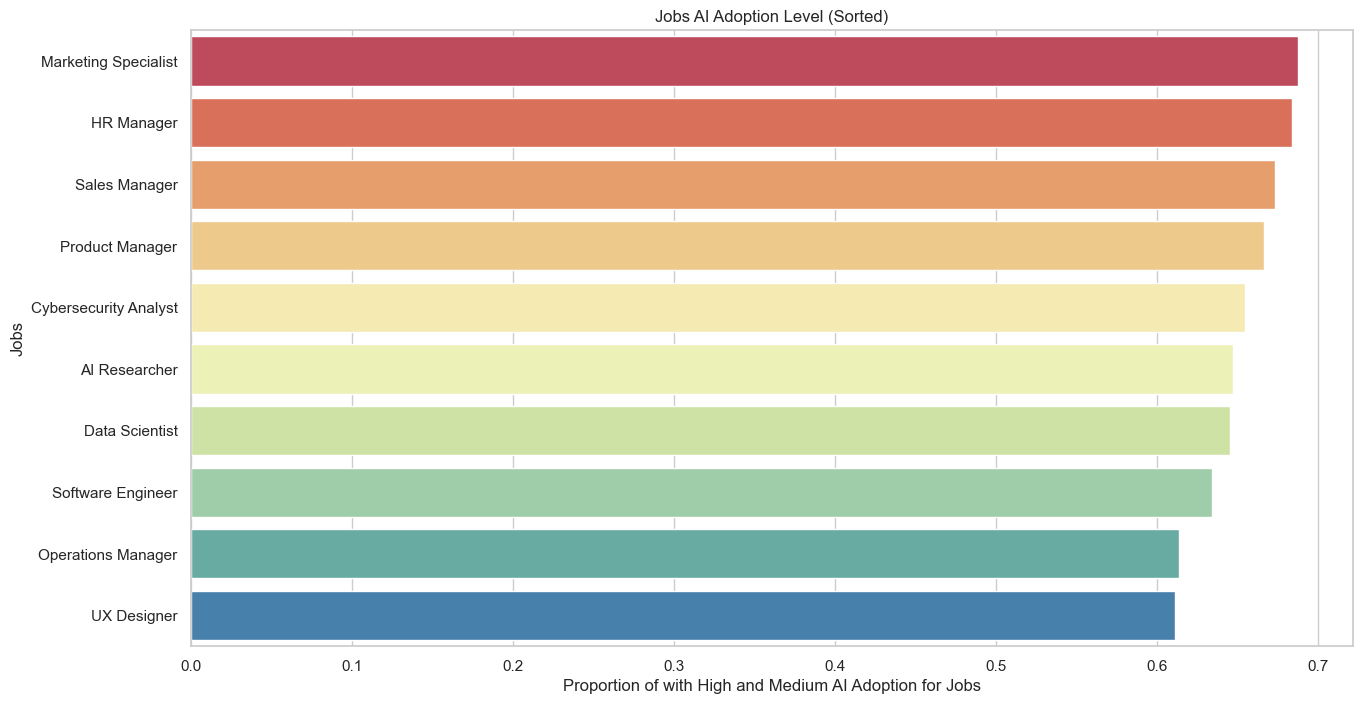

In [114]:
# EDA: explor the jobs has the highest AI adoption level
df_EDA_1 = df.copy()
# group ai adoption level by industry
high_medium_adoption = df_EDA_1[df_EDA_1['AI_Adoption_Level'].isin(['High', 'Medium'])].groupby('Job_Title').size().reset_index(name='High_Medium_Adoption_Count')

# compute proportions
total_per_Job = df_EDA.groupby('Job_Title').size().reset_index(name='Total_Count')
merged_data = pd.merge(high_medium_adoption, total_per_Job, on='Job_Title')
merged_data['High_Medium_Adoption_Proportion'] = merged_data['High_Medium_Adoption_Count'] / merged_data['Total_Count']

# sort AI adoption proportion
sorted_data = merged_data.sort_values(by='High_Medium_Adoption_Proportion', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='High_Medium_Adoption_Proportion', y='Job_Title', data=sorted_data, palette='Spectral')
plt.title('Jobs AI Adoption Level (Sorted)')
plt.xlabel('Proportion of with High and Medium AI Adoption for Jobs')
plt.ylabel('Jobs')

fig = plt.gcf()
fig.savefig('790/AIjob_adoptionVSjob.png', dpi=300)

plt.show()

In [129]:
# explore required skills for job "UX Designer"
ux_designer_rows = df[df['Job_Title'] == 'UX Designer']

print("Rows where Job_Title is 'UX Designer':")
print(ux_designer_rows[['Job_Title','Required_Skills']])


Rows where Job_Title is 'UX Designer':
       Job_Title     Required_Skills
5    UX Designer       Cybersecurity
22   UX Designer       Cybersecurity
26   UX Designer        UX/UI Design
42   UX Designer          JavaScript
44   UX Designer              Python
59   UX Designer  Project Management
63   UX Designer  Project Management
65   UX Designer           Marketing
75   UX Designer        UX/UI Design
93   UX Designer  Project Management
95   UX Designer  Project Management
116  UX Designer              Python
120  UX Designer    Machine Learning
121  UX Designer  Project Management
135  UX Designer           Marketing
140  UX Designer           Marketing
158  UX Designer  Project Management
166  UX Designer       Communication
187  UX Designer       Communication
208  UX Designer  Project Management
225  UX Designer       Cybersecurity
228  UX Designer          JavaScript
313  UX Designer       Cybersecurity
315  UX Designer              Python
323  UX Designer               Sales

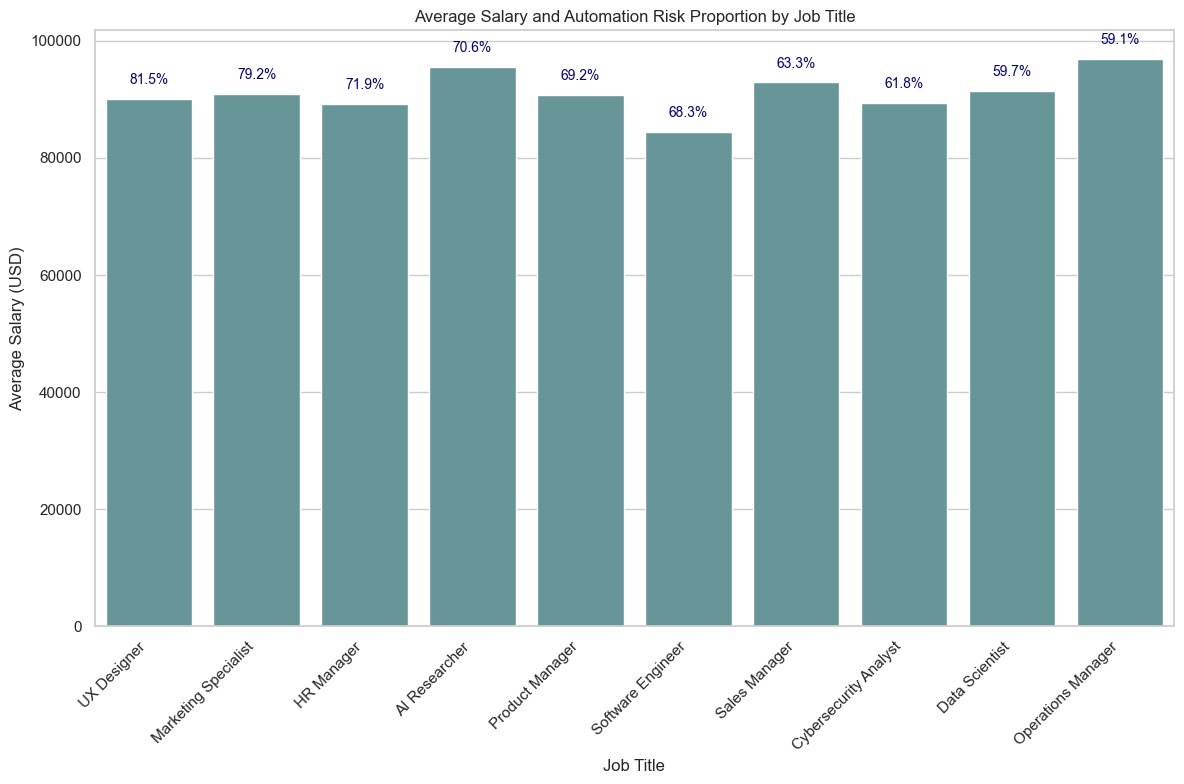

In [116]:
# EDA: jobs (Job_Title) versus their average salary by Automation Risk 
df_EDA_2 = df.copy()

# calculate the proportion of "High" or "Medium" Automation Risk for each Job_Title
high_medium_risk = df_EDA_2[df_EDA_2['Automation_Risk'].isin(['High', 'Medium'])].groupby('Job_Title').size().reset_index(name='High_Medium_Risk_Count')

# total number of jobs for each Job_Title
total_per_job = df_EDA_2.groupby('Job_Title').size().reset_index(name='Total_Count')

# merge and calculate proportion
risk_data = pd.merge(high_medium_risk, total_per_job, on='Job_Title')
risk_data['Automation_Risk_Proportion'] = risk_data['High_Medium_Risk_Count'] / risk_data['Total_Count']
risk_data['Automation_Risk_Percentage'] = risk_data['Automation_Risk_Proportion'] * 100  # Convert to percentage

# calculate the average salary 
avg_salary = df_EDA_2.groupby('Job_Title')['Salary_USD'].mean().reset_index()

# merge the average salary and automation risk data
merged_data = pd.merge(avg_salary, risk_data[['Job_Title', 'Automation_Risk_Proportion', 'Automation_Risk_Percentage']], on='Job_Title')

# Sort by automation risk percentage 
sorted_data = merged_data.sort_values(by='Automation_Risk_Percentage', ascending=False)


plt.figure(figsize=(12, 8))

bars = sns.barplot(x='Job_Title', y='Salary_USD', data=sorted_data, color='cadetblue')

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    percentage = sorted_data.iloc[i]['Automation_Risk_Percentage']
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2000, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='darkblue')

plt.title('Average Salary and Automation Risk Proportion by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
fig = plt.gcf()
fig.savefig('790/AIjob_riskVSjob.png', dpi=300)

plt.show()

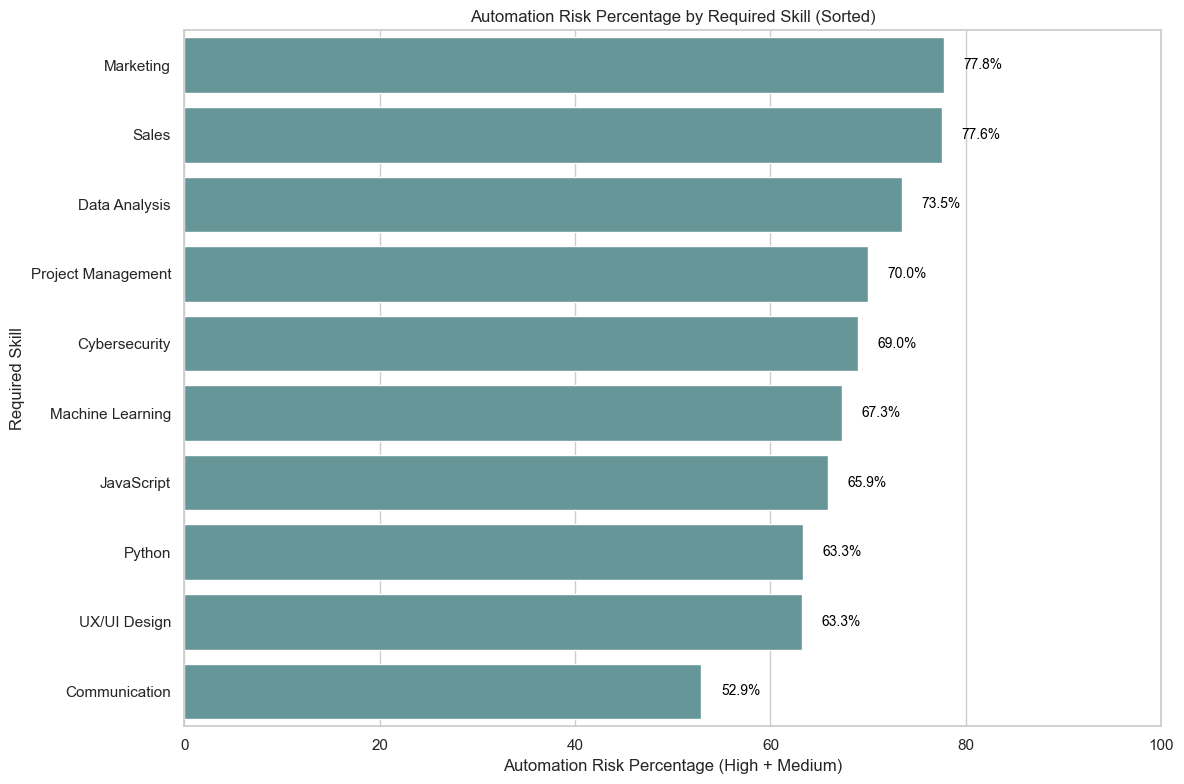

In [117]:
# EDA: explor the skills vs automation risk
df_EDA_3 = df.copy()

df_EDA_3['Required_Skills'] = df_EDA_3['Required_Skills'].str.split(', ')  
df_exploded = df_EDA_3.explode('Required_Skills')  

# calculate the proportion of "High" or "Medium" Automation Risk for each skill
high_medium_risk = df_exploded[df_exploded['Automation_Risk'].isin(['High', 'Medium'])].groupby('Required_Skills').size().reset_index(name='High_Medium_Risk_Count')

# total jobs per skill
total_per_skill = df_exploded.groupby('Required_Skills').size().reset_index(name='Total_Count')

# merge and calculate proportion
risk_data = pd.merge(high_medium_risk, total_per_skill, on='Required_Skills')
risk_data['Automation_Risk_Proportion'] = risk_data['High_Medium_Risk_Count'] / risk_data['Total_Count']
risk_data['Automation_Risk_Percentage'] = risk_data['Automation_Risk_Proportion'] * 100  # Convert to percentage

# sort by automation risk percentage
sorted_data = risk_data.sort_values(by='Automation_Risk_Percentage', ascending=False)

plt.figure(figsize=(12, 8))
bars = sns.barplot(x='Automation_Risk_Percentage', y='Required_Skills', data=sorted_data, color='cadetblue')

for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', 
             ha='left', va='center', fontsize=10, color='black')

plt.title('Automation Risk Percentage by Required Skill (Sorted)')
plt.xlabel('Automation Risk Percentage (High + Medium)')
plt.ylabel('Required Skill')
plt.xlim(0, 100)  
plt.tight_layout()

fig = plt.gcf()
fig.savefig('790/AIjob_riskVSskills.png', dpi=300)
plt.show()

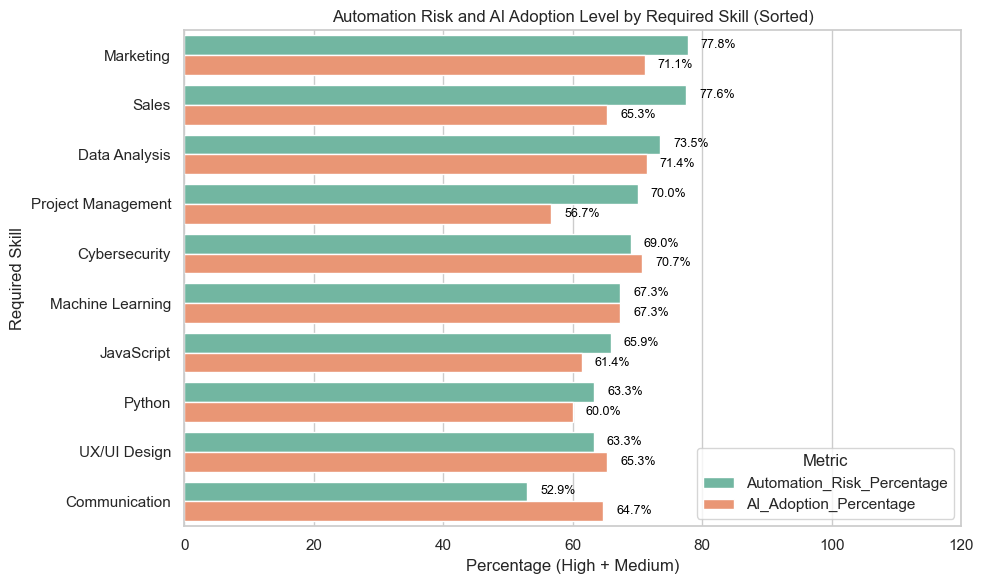

In [213]:

df_EDA_4 = df.copy()

# EDA

# calculate the proportion of "High" or "Medium" Automation Risk for each skill
high_medium_risk = df_EDA_4[df_EDA_4['Automation_Risk'].isin(['High', 'Medium'])].groupby('Required_Skills').size().reset_index(name='High_Medium_Risk_Count')
total_per_skill = df_EDA_4.groupby('Required_Skills').size().reset_index(name='Total_Count')
risk_data = pd.merge(high_medium_risk, total_per_skill, on='Required_Skills')
risk_data['Automation_Risk_Proportion'] = risk_data['High_Medium_Risk_Count'] / risk_data['Total_Count']
risk_data['Automation_Risk_Percentage'] = risk_data['Automation_Risk_Proportion'] * 100

# calculate the proportion of "High" or "Medium" AI Adoption Level for each skill
high_medium_adoption = df_EDA_4[df_EDA_4['AI_Adoption_Level'].isin(['High', 'Medium'])].groupby('Required_Skills').size().reset_index(name='High_Medium_Adoption_Count')
adoption_data = pd.merge(high_medium_adoption, total_per_skill, on='Required_Skills')
adoption_data['AI_Adoption_Proportion'] = adoption_data['High_Medium_Adoption_Count'] / adoption_data['Total_Count']
adoption_data['AI_Adoption_Percentage'] = adoption_data['AI_Adoption_Proportion'] * 100

# merge 
merged_data = pd.merge(risk_data[['Required_Skills', 'Automation_Risk_Percentage']], 
                       adoption_data[['Required_Skills', 'AI_Adoption_Percentage']], 
                       on='Required_Skills')


melted_data = pd.melt(merged_data, id_vars=['Required_Skills'], 
                      value_vars=['Automation_Risk_Percentage', 'AI_Adoption_Percentage'], 
                      var_name='Metric', value_name='Percentage')

# sort by Automation Risk Percentage 
skill_order = merged_data.sort_values(by='Automation_Risk_Percentage', ascending=False)['Required_Skills']


plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Percentage', y='Required_Skills', hue='Metric', data=melted_data, 
                   order=skill_order, palette='Set2')

for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    if width > 0:
        plt.text(width + 2, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', 
                 ha='left', va='center', fontsize=9, color='black')


plt.title('Automation Risk and AI Adoption Level by Required Skill (Sorted)')
plt.xlabel('Percentage (High + Medium)')
plt.ylabel('Required Skill')
plt.xlim(0, 120)  
plt.legend(title='Metric')
plt.tight_layout()

fig = plt.gcf()
fig.savefig('790/AIjob_riskVSskillVSadoption.png', dpi=300)
plt.show()


In [130]:
## data preprocessing
# (1) one-hot encode Job_Title, Industry, Required_Skills, and Job_Growth_Projection
categorical_columns = ['Job_Title', 'Industry', 'Required_Skills', 'Job_Growth_Projection']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# (2) ordinal encoding Company_Size (Small=1, Medium=2, Large=3)
company_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df_encoded['Company_Size'] = df_encoded['Company_Size'].map(company_size_mapping)

# (3) ordinal encoding AI_Adoption_Level (Low=1, Medium=2, High=3)
ai_adoption_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['AI_Adoption_Level'] = df_encoded['AI_Adoption_Level'].map(ai_adoption_mapping)

# (4) binary encode Remote_Friendly (No=0, Yes=1)
remote_friendly_mapping = {'No': 0, 'Yes': 1}
df_encoded['Remote_Friendly'] = df_encoded['Remote_Friendly'].map(remote_friendly_mapping)

# (5) drop irrelevent column Location 
df_encoded = df_encoded.drop(columns=['Location'])

# (6) label encode the target variable Automation_Risk (Low=0, Medium=1, High=2)
automation_risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['Automation_Risk'] = df_encoded['Automation_Risk'].map(automation_risk_mapping)

In [131]:
#df_encoded
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Company_Size                        500 non-null    int64  
 1   AI_Adoption_Level                   500 non-null    int64  
 2   Automation_Risk                     500 non-null    int64  
 3   Salary_USD                          500 non-null    float64
 4   Remote_Friendly                     500 non-null    int64  
 5   Job_Title_AI Researcher             500 non-null    bool   
 6   Job_Title_Cybersecurity Analyst     500 non-null    bool   
 7   Job_Title_Data Scientist            500 non-null    bool   
 8   Job_Title_HR Manager                500 non-null    bool   
 9   Job_Title_Marketing Specialist      500 non-null    bool   
 10  Job_Title_Operations Manager        500 non-null    bool   
 11  Job_Title_Product Manager           500 non-n

In [133]:
# stratified train/test split
X = df_encoded.drop('Automation_Risk', axis=1)
y = df_encoded['Automation_Risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y,random_state=42
)

print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
Automation_Risk
1    0.3450
2    0.3375
0    0.3175
Name: proportion, dtype: float64

Test set class distribution:
Automation_Risk
1    0.35
2    0.34
0    0.31
Name: proportion, dtype: float64


In [ ]:
# standardlize Salary_USD 
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled['Salary_USD'] = scaler.fit_transform(X_train[['Salary_USD']])
X_test_scaled['Salary_USD'] = scaler.transform(X_test[['Salary_USD']])

In [156]:
# parameter tuning with GridSearchCV
# define parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['log2', 'sqrt'],
    'max_leaf_nodes':[None, 10, 50]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'subsample': [0.8, 0.9, 1.0]
}

# initialize models
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
gb = GradientBoostingClassifier(random_state=42)

# GridSearchCV for random forest
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid_search = GridSearchCV(
    estimator=rf, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
rf_grid_search.fit(X_train_scaled,y_train)
rf_best = rf_grid_search.best_estimator_

# GridSearchCV for gradient boosting
gb_grid_search = GridSearchCV(
    estimator=gb, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
gb_grid_search.fit(X_train_scaled, y_train)
gb_best = gb_grid_search.best_estimator_


print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation training accuracy for Random Forest:", rf_grid_search.best_score_)
print("\nBest parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best cross-validation training accuracy for Gradient Boosting:", gb_grid_search.best_score_)




Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation training accuracy for Random Forest: 0.365

Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}
Best cross-validation training accuracy for Gradient Boosting: 0.3575


In [150]:
import joblib
joblib.dump(rf_best, 'RF_model_scale.pkl')
joblib.dump(gb_best, 'GD_model_scale.pkl')
#joblib.dump(selected_features, 'selected_features.pkl')

['GD_model_scale.pkl']

In [ ]:
# test the best_base_model 
# Random Forest predictions 
rf_pred = rf_best.predict(X_test_scaled)
print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=['Low', 'Medium', 'High']))

# Gradient Boosting predictions
gb_pred = rf_best.predict(X_test_scaled)
print("\nGradient Boosting Test Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred, target_names=['Low', 'Medium', 'High']))


Random Forest Test Accuracy: 0.38
Random Forest Classification Report:
              precision    recall  f1-score   support

         Low       0.34      0.42      0.38        31
      Medium       0.49      0.51      0.50        35
        High       0.28      0.21      0.24        34

    accuracy                           0.38       100
   macro avg       0.37      0.38      0.37       100
weighted avg       0.37      0.38      0.37       100


Gradient Boosting Test Accuracy: 0.38
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         Low       0.34      0.42      0.38        31
      Medium       0.49      0.51      0.50        35
        High       0.28      0.21      0.24        34

    accuracy                           0.38       100
   macro avg       0.37      0.38      0.37       100
weighted avg       0.37      0.38      0.37       100



In [159]:
# feature selection
# method 1: feature importance from RF
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances (Top 10):")
print(rf_importances.head(10))

# top 15 features from RF
top_rf_features = rf_importances['Feature'].head(15).tolist()

top_rf_features


Random Forest Feature Importances (Top 10):
                            Feature  Importance
2                        Salary_USD    0.258688
1                 AI_Adoption_Level    0.063146
0                      Company_Size    0.052814
13            Job_Title_UX Designer    0.036372
32            Required_Skills_Sales    0.033600
3                   Remote_Friendly    0.033598
23          Industry_Transportation    0.030846
29        Required_Skills_Marketing    0.029937
7              Job_Title_HR Manager    0.028582
5   Job_Title_Cybersecurity Analyst    0.022322


['Salary_USD',
 'AI_Adoption_Level',
 'Company_Size',
 'Job_Title_UX Designer',
 'Required_Skills_Sales',
 'Remote_Friendly',
 'Industry_Transportation',
 'Required_Skills_Marketing',
 'Job_Title_HR Manager',
 'Job_Title_Cybersecurity Analyst',
 'Required_Skills_Communication',
 'Job_Growth_Projection_Stable',
 'Industry_Telecommunications',
 'Job_Title_AI Researcher',
 'Industry_Healthcare']

/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_19113/3607032622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances.head(15), palette='ocean')


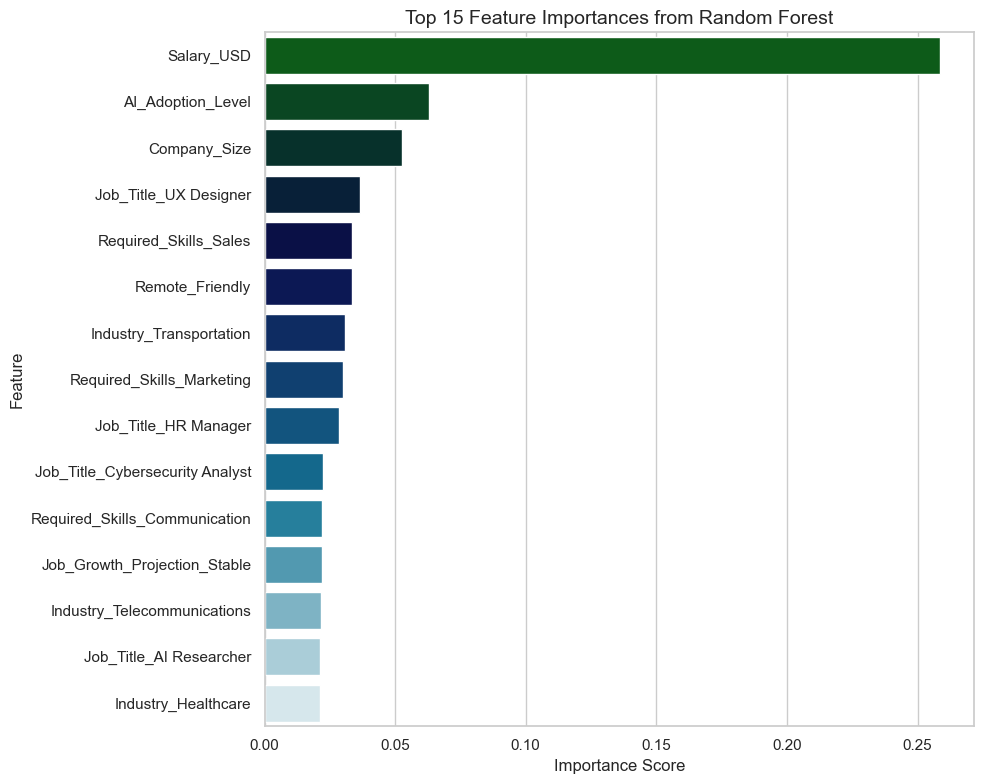

In [176]:

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(15), palette='ocean')

plt.title('Top 15 Feature Importances from Random Forest', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
fig = plt.gcf()
fig.savefig('790/AI_featureSelection_1.png', dpi=300)

plt.show()

In [ ]:
# feature selection
# method 2: Recursive Feature Elimination (RFE) with Gradient Boostinga
rfe = RFE(estimator=gb_best, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

rfe_selected = X.columns[rfe.support_].tolist()
print("\nSelected Features by RFE (Gradient Boosting):")
print(rfe_selected)

# combine features selected by both methods (intersection)
selected_features = list(set(top_rf_features).intersection(set(rfe_selected)))
print("\nFeatures selected by both methods:")
print(selected_features)


Selected Features by RFE (Gradient Boosting):
['Company_Size', 'AI_Adoption_Level', 'Salary_USD', 'Remote_Friendly', 'Job_Title_Cybersecurity Analyst', 'Job_Title_Marketing Specialist', 'Job_Title_Sales Manager', 'Job_Title_UX Designer', 'Industry_Energy', 'Industry_Manufacturing', 'Industry_Telecommunications', 'Required_Skills_Machine Learning', 'Job_Growth_Projection_Decline', 'Job_Growth_Projection_Growth', 'Job_Growth_Projection_Stable']

Features selected by both methods:
['Company_Size', 'Job_Title_UX Designer', 'Job_Growth_Projection_Stable', 'Industry_Telecommunications', 'Job_Title_Cybersecurity Analyst', 'Remote_Friendly', 'AI_Adoption_Level', 'Salary_USD']


/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_19113/4202983108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rfe_importances, palette='pink')


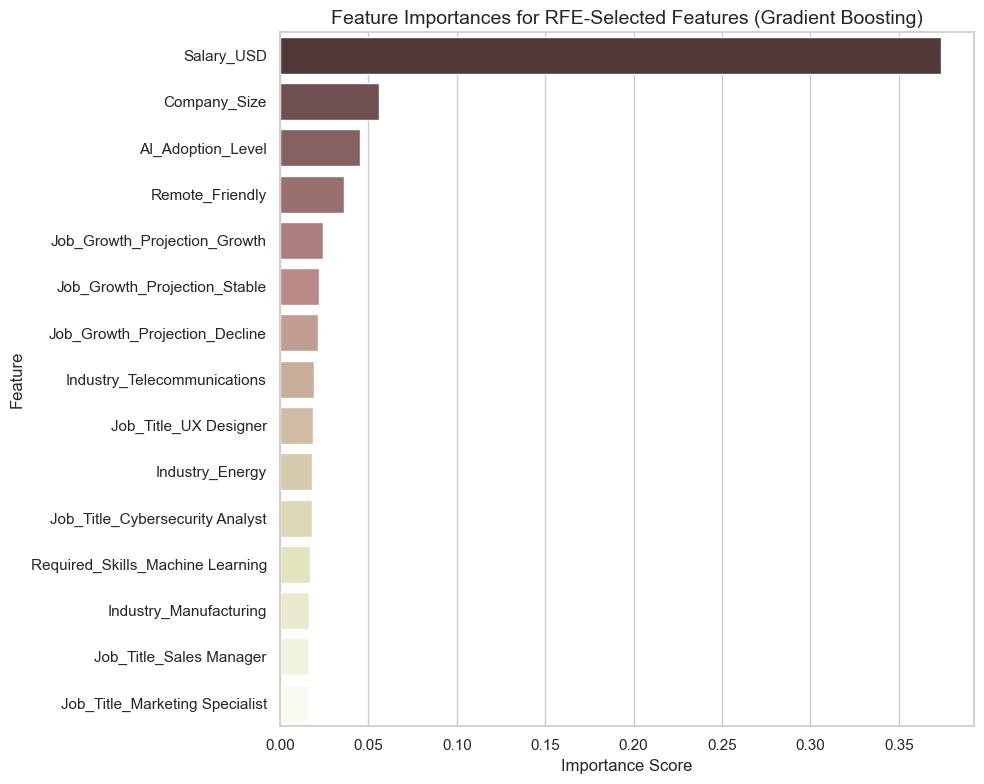

In [177]:
gb_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

# plot RFE-selected features
rfe_importances = gb_importances[gb_importances['Feature'].isin(rfe_selected)]

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=rfe_importances, palette='pink')
plt.title('Feature Importances for RFE-Selected Features (Gradient Boosting)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
fig = plt.gcf()
fig.savefig('790/AI_featureSelection_2.png', dpi=300)
plt.show()

/var/folders/_l/922q143j2tj5f063l0vxr_500000gn/T/ipykernel_19113/3686444989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=intersection_importances, palette="cividis")


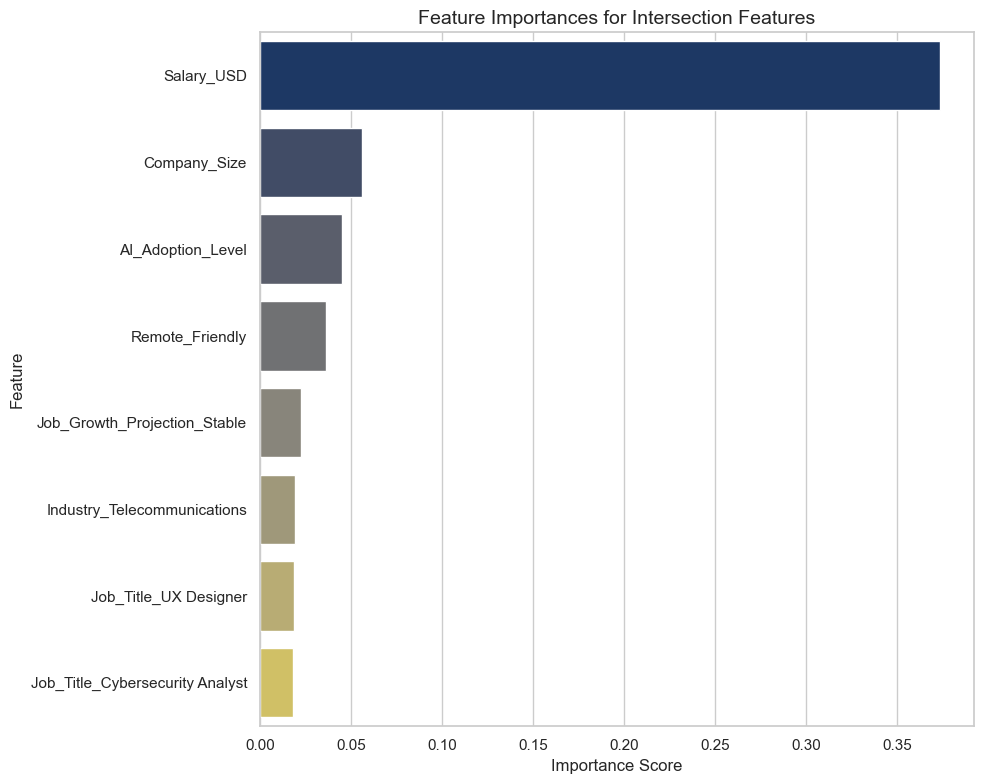

In [179]:
# plot for intersection features
intersection_importances = gb_importances[gb_importances['Feature'].isin(selected_features)]

plt.figure(figsize=(10, 8))  
sns.barplot(x='Importance', y='Feature', data=intersection_importances, palette="cividis")
plt.title('Feature Importances for Intersection Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
fig = plt.gcf()
fig.savefig('790/AI_featureSelection_3.png', dpi=300)
plt.show()

In [ ]:
# training and test sets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# refit Random Forest with selected features
rf_selected = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# refit Gradient Boosting with selected features
gb_selected = GradientBoostingClassifier(**gb_grid_search.best_params_, random_state=42)
gb_selected.fit(X_train_selected, y_train)

# evaluate on test set with selected features
rf_pred_selected = rf_selected.predict(X_test_selected)
gb_pred_selected = gb_selected.predict(X_test_selected)

print("\nRandom Forest (Selected Features) Test Accuracy:", accuracy_score(y_test, rf_pred_selected))
print("Random Forest (Selected Features) Classification Report:")
print(classification_report(y_test, rf_pred_selected, target_names=['Low', 'Medium', 'High']))

print("\nGradient Boosting (Selected Features) Test Accuracy:", accuracy_score(y_test, gb_pred_selected))
print("Gradient Boosting (Selected Features) Classification Report:")
print(classification_report(y_test, gb_pred_selected, target_names=['Low', 'Medium', 'High']))


Random Forest (Selected Features) Test Accuracy: 0.39
Random Forest (Selected Features) Classification Report:
              precision    recall  f1-score   support

         Low       0.37      0.23      0.28        31
      Medium       0.49      0.54      0.51        35
        High       0.31      0.38      0.34        34

    accuracy                           0.39       100
   macro avg       0.39      0.38      0.38       100
weighted avg       0.39      0.39      0.38       100


Gradient Boosting (Selected Features) Test Accuracy: 0.4
Gradient Boosting (Selected Features) Classification Report:
              precision    recall  f1-score   support

         Low       0.36      0.32      0.34        31
      Medium       0.42      0.49      0.45        35
        High       0.41      0.38      0.39        34

    accuracy                           0.40       100
   macro avg       0.40      0.40      0.40       100
weighted avg       0.40      0.40      0.40       100



In [180]:
from sklearn.metrics import adjusted_rand_score

# ARI for each model
ari_rf_base = adjusted_rand_score(y_test, rf_pred)
ari_rf_feature = adjusted_rand_score(y_test, rf_pred_selected)
ari_gb_base = adjusted_rand_score(y_test, gb_pred)
ari_gb_feature = adjusted_rand_score(y_test, gb_pred_selected)

print("ARI for RF_base:", ari_rf_base)
print("ARI for RF_Feature:", ari_rf_feature)
print("ARI for GB_Base:", ari_gb_base)
print("ARI for GB_feature:", ari_gb_feature)

ARI for RF_base: 0.020433115621151007
ARI for RF_Feature: 0.021844814360608
ARI for GB_Base: 0.020433115621151007
ARI for GB_feature: -0.007887191627749037


In [182]:
# visulization of results
# accuracy 
accuracy_rf_base = accuracy_score(y_test, rf_pred)
accuracy_rf_feature = accuracy_score(y_test, rf_pred_selected)
accuracy_gb_base = accuracy_score(y_test, gb_pred)
accuracy_gb_feature = accuracy_score(y_test, gb_pred_selected)

# F1-scores
f1_rf_base = f1_score(y_test, rf_pred, average='macro')
f1_rf_feature = f1_score(y_test, rf_pred_selected, average='macro')
f1_gb_base = f1_score(y_test, gb_pred, average='macro')
f1_gb_feature = f1_score(y_test, gb_pred_selected, average='macro')

# ARI
ari_scores = [ari_rf_base, ari_rf_feature, ari_gb_base, ari_gb_feature]

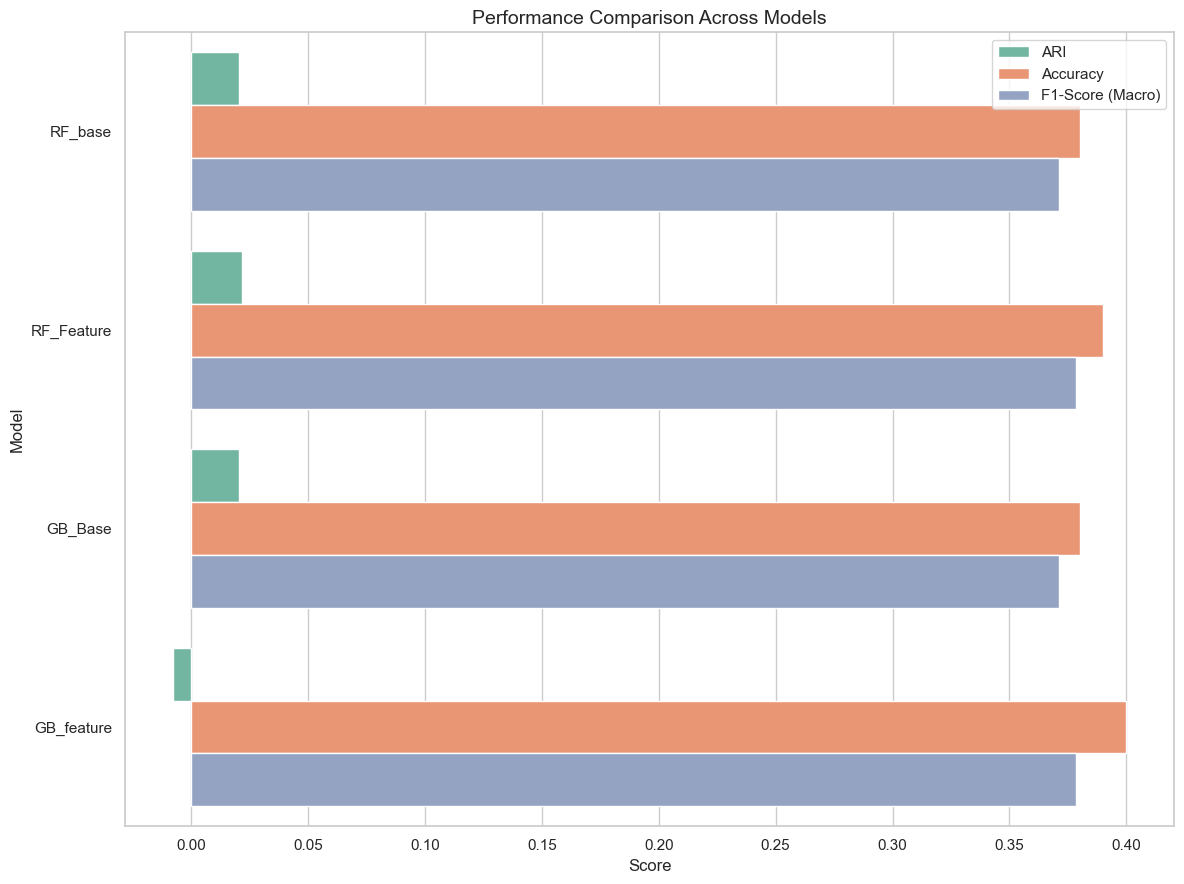

In [210]:
models = ['RF_base', 'RF_Feature', 'GB_Base', 'GB_feature']
metrics_df = pd.DataFrame({
    'Model': models * 3,
    'Metric': ['ARI'] * 4 + ['Accuracy'] * 4 + ['F1-Score (Macro)'] * 4,
    'Score': ari_scores + [accuracy_rf_base, accuracy_rf_feature, accuracy_gb_base, accuracy_gb_feature] + 
             [f1_rf_base, f1_rf_feature, f1_gb_base, f1_rf_feature]
})

plt.figure(figsize=(12, 9))
sns.barplot(x='Score', y='Model', hue='Metric', data=metrics_df, palette='Set2')
plt.title('Performance Comparison Across Models', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.legend()
plt.tight_layout()
fig = plt.gcf()
fig.savefig('790/AI_result.png', dpi=300)
plt.show()

In [212]:
print(f1_rf_base )
print(f1_rf_feature )
print(f1_gb_base )
print(f1_gb_feature )

0.37136657659870626
0.3785395922238028
0.37136657659870626
0.39541859270672824
